In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#state space, state 0 is terminal
nbStates = 6 #nincluding terminal states
S=np.arange(nbStates)
pi=0.5*np.ones(nbStates)
gamma=1.0

In [61]:
nbEpisodes = 100
nbRuns=100

alpha_MC = (1.0+np.arange(5))/100.0
alpha_TD = (1.0+np.arange(5))/20.0
nbAlpha = np.size(alpha_MC)

In [62]:
v_pi=(1.0/6.0)*np.arange(nbStates)
print v_pi

[ 0.          0.16666667  0.33333333  0.5         0.66666667  0.83333333]


In [63]:
v_MC = 0.5*np.ones((nbAlpha, nbRuns, nbEpisodes,nbStates))
v_TD = 0.5*np.ones((nbAlpha, nbRuns, nbEpisodes,nbStates))
v_TD[:,:,:,0]=0.0
v_MC[:,:,:,0]=0.0

for a in range(nbAlpha):
    for r in range(nbRuns):
        for e in range(1,nbEpisodes):
            #retain values from last episode
            v_TD[a,r,e,:]=v_TD[a,r,e-1,:]
            v_MC[a,r,e,:]=v_MC[a,r,e-1,:]
            
            G=0 #total return, G=1 if episode ends on the right, 0 otherwise
            s=3 #initial state
            
            nbVisits = np.zeros(nbStates)
            
            while(s>0):
                
                #count the number of visits to that state
                nbVisits[s]+=1
                
                if(np.random.rand()<pi[s]):
                    #go left
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(0+gamma*v_TD[a,r,e,s-1]-v_TD[a,r,e,s])
                    s-=1
                elif(s==nbStates-1):
                    #go right, episode ends
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(1+gamma*v_TD[a,r,e,0]-v_TD[a,r,e,s])
                    s=0
                    G=1
                else:
                    #go right
                    v_TD[a,r,e,s] = v_TD[a,r,e,s] + alpha_TD[a]*(0+gamma*v_TD[a,r,e,s+1]-v_TD[a,r,e,s])
                    s+=1
            
            #now that episode is ended, perform MC update of visited states
            for s in range(1,nbStates):
                for i in range(int(nbVisits[s])):
                    v_MC[a,r,e,s]=v_MC[a,r,e,s] + alpha_MC[a]*(G-v_MC[a,r,e,s])
                    
                

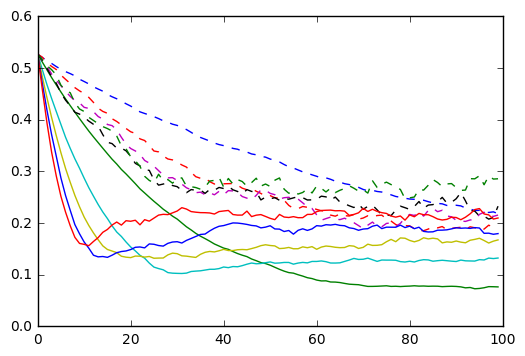

In [64]:
#compute RMS errors for each alpha value
rms_MC = np.average(np.sqrt(np.sum(np.square(v_MC[:,:,:,:]-v_pi),3)),1)
rms_TD = np.average(np.sqrt(np.sum(np.square(v_TD[:,:,:,:]-v_pi),3)),1)

for a in range(nbAlpha):
    plt.plot(range(nbEpisodes),rms_MC[a,:],'--')
    plt.plot(range(nbEpisodes),rms_TD[a,:],'-')
    
plt.show()